In [1]:
# Import the required modules
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Loading and Preprocessing Data

In [2]:
# Read the preprocessed_doggy file into a DataFrame
doggy_df = pd.read_csv(
    Path("preprocessed_doggy.csv")
)

# Review the DataFrame
display(doggy_df.head())
display(doggy_df.tail())

,Unnamed: 0,Borough,dog_friendly,income_cat,grooming_frequency,shedding,energy_level,trainability,demeanor,size,life_expectancy,lifetime_cost,Breed
0,0,Bronx,Yes,middle,0.4,0.4,0.8,0.8,1.0,Small 9-35lb,0.6,Low,Boxer
1,1,Manhattan,Yes,high,0.8,0.2,0.6,0.6,1.0,Toy >9lb,0.8,Medium,Maltese
2,2,Manhattan,Yes,high,1.0,0.2,0.6,0.2,0.8,Toy >9lb,0.8,Medium,Yorkshire Terrier
3,3,Brooklyn,Yes,low,0.4,0.8,0.6,1.0,0.6,Small 9-35lb,0.4,Low,German Shepherd Dog
4,4,Brooklyn,Yes,high,0.4,0.4,0.4,1.0,0.8,Toy >9lb,0.8,Medium,Cavalier King Charles Spaniel


,Unnamed: 0,Borough,dog_friendly,income_cat,grooming_frequency,shedding,energy_level,trainability,demeanor,size,life_expectancy,lifetime_cost,Breed
275750,275750,Queens,Yes,middle,1.0,0.2,0.6,0.2,0.8,Toy >9lb,0.8,Medium,Yorkshire Terrier
275751,275751,Manhattan,Yes,high,0.4,0.4,0.4,1.0,0.8,Toy >9lb,0.8,Medium,Cavalier King Charles Spaniel
275752,275752,Brooklyn,No,middle,0.2,0.4,0.6,0.4,0.6,Toy >9lb,1.0,High,Chihuahua
275753,275753,Staten Island,No,middle,0.4,0.8,1.0,1.0,1.0,Small 9-35lb,0.6,Medium,Labrador Retriever
275754,275754,Queens,No,middle,0.4,0.2,0.6,1.0,1.0,Toy >9lb,0.8,Low,Boston Terrier


In [3]:
# Remove the Unnamed col
doggy_df = doggy_df[['Borough', 'dog_friendly', 'income_cat',
       'grooming_frequency', 'shedding', 'energy_level', 'trainability',
       'demeanor', 'size', 'life_expectancy', 'lifetime_cost', 'Breed']]

doggy_df.head()

,Borough,dog_friendly,income_cat,grooming_frequency,shedding,energy_level,trainability,demeanor,size,life_expectancy,lifetime_cost,Breed
0,Bronx,Yes,middle,0.4,0.4,0.8,0.8,1.0,Small 9-35lb,0.6,Low,Boxer
1,Manhattan,Yes,high,0.8,0.2,0.6,0.6,1.0,Toy >9lb,0.8,Medium,Maltese
2,Manhattan,Yes,high,1.0,0.2,0.6,0.2,0.8,Toy >9lb,0.8,Medium,Yorkshire Terrier
3,Brooklyn,Yes,low,0.4,0.8,0.6,1.0,0.6,Small 9-35lb,0.4,Low,German Shepherd Dog
4,Brooklyn,Yes,high,0.4,0.4,0.4,1.0,0.8,Toy >9lb,0.8,Medium,Cavalier King Charles Spaniel


In [4]:
# Define features set
X = doggy_df.copy()
X.drop("Breed", axis=1, inplace=True)
X.head()

,Borough,dog_friendly,income_cat,grooming_frequency,shedding,energy_level,trainability,demeanor,size,life_expectancy,lifetime_cost
0,Bronx,Yes,middle,0.4,0.4,0.8,0.8,1.0,Small 9-35lb,0.6,Low
1,Manhattan,Yes,high,0.8,0.2,0.6,0.6,1.0,Toy >9lb,0.8,Medium
2,Manhattan,Yes,high,1.0,0.2,0.6,0.2,0.8,Toy >9lb,0.8,Medium
3,Brooklyn,Yes,low,0.4,0.8,0.6,1.0,0.6,Small 9-35lb,0.4,Low
4,Brooklyn,Yes,high,0.4,0.4,0.4,1.0,0.8,Toy >9lb,0.8,Medium


In [5]:
# Define target vector
y = doggy_df["Breed"].ravel()
y[:5]

array(['Boxer', 'Maltese', 'Yorkshire Terrier', 'German Shepherd Dog',
       'Cavalier King Charles Spaniel'], dtype=object)

In [6]:
# Use LabelEncoder to convert targets(50) into a single column
# Use LabelEncoder on the y DataFrame to encode the Dog Breeds
label_encoder_df = LabelEncoder()

# Encode Labels
y_encoded = label_encoder_df.fit_transform(y)

# Test the results of the encoder
# Display first 50 of encoded column
display(y_encoded[0:50])

# Get the original labels back
display(label_encoder_df.inverse_transform(y_encoded[0:50]))

array([10, 30, 49, 24, 14, 14, 10, 10,  3, 28,  3, 25,  3, 49, 29,  9,  6,
       25, 26,  6, 14, 10, 15, 30, 15, 29, 15, 49,  3,  6, 44, 29, 44,  3,
       26, 16,  3, 23, 45, 37, 10, 15, 29, 12, 43, 39, 49, 28, 15, 30])

array(['Boxer', 'Maltese', 'Yorkshire Terrier', 'German Shepherd Dog',
       'Cavalier King Charles Spaniel', 'Cavalier King Charles Spaniel',
       'Boxer', 'Boxer', 'Beagle', 'Havanese', 'Beagle',
       'German Shorthaired Pointer', 'Beagle', 'Yorkshire Terrier',
       'Labrador Retriever', 'Boston Terrier', 'Bichon Frise',
       'German Shorthaired Pointer', 'Golden Retriever', 'Bichon Frise',
       'Cavalier King Charles Spaniel', 'Boxer', 'Chihuahua', 'Maltese',
       'Chihuahua', 'Labrador Retriever', 'Chihuahua',
       'Yorkshire Terrier', 'Beagle', 'Bichon Frise', 'Shih Tzu',
       'Labrador Retriever', 'Shih Tzu', 'Beagle', 'Golden Retriever',
       'Cocker Spaniel', 'Beagle', 'French Bulldog', 'Siberian Husky',
       'Poodle', 'Boxer', 'Chihuahua', 'Labrador Retriever', 'Bulldog',
       'Shiba Inu', 'Pug', 'Yorkshire Terrier', 'Havanese', 'Chihuahua',
       'Maltese'], dtype=object)

In [7]:
# Use get_dummies to convert category types to numbers
y = pd.get_dummies(y, dtype=int)
X = pd.get_dummies(X, dtype=int)

In [8]:
display(y.sample(10))
display(X.head(3))

,Australian Cattle Dog,Australian Shepherd,Basset Hound,Beagle,Belgian Malinois,Bernese Mountain Dog,Bichon Frise,Bloodhound,Border Collie,Boston Terrier,...,Rhodesian Ridgeback,Rottweiler,Shetland Sheepdog,Shiba Inu,Shih Tzu,Siberian Husky,Vizsla,Weimaraner,West Highland White Terrier,Yorkshire Terrier
147709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246970,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
181699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
259224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
212670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37000,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
74673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


,grooming_frequency,shedding,energy_level,trainability,demeanor,life_expectancy,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,...,income_cat_low,income_cat_middle,size_Giant <75lb,size_Large 55-75lb,size_Medium 35-55lb,size_Small 9-35lb,size_Toy >9lb,lifetime_cost_High,lifetime_cost_Low,lifetime_cost_Medium
0,0.4,0.4,0.8,0.8,1.0,0.6,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0.8,0.2,0.6,0.6,1.0,0.8,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,1.0,0.2,0.6,0.2,0.8,0.8,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [9]:
# Convert Features/Targets into a form suitable for Modeling
y = y_encoded
X = pd.get_dummies(X, dtype=int)

In [10]:
# Look at X, y data
display(y)
display(X.head(3))

array([10, 30, 49, ..., 15, 29,  9])

,grooming_frequency,shedding,energy_level,trainability,demeanor,life_expectancy,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,...,income_cat_low,income_cat_middle,size_Giant <75lb,size_Large 55-75lb,size_Medium 35-55lb,size_Small 9-35lb,size_Toy >9lb,lifetime_cost_High,lifetime_cost_Low,lifetime_cost_Medium
0,0.4,0.4,0.8,0.8,1.0,0.6,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0.8,0.2,0.6,0.6,1.0,0.8,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,1.0,0.2,0.6,0.2,0.8,0.8,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [11]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [13]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [14]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Fitting the Decision Tree Model

In [15]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [16]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

# Making Predictions Using the Decision Tree Model

In [17]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

# Feature Importance

In [18]:
# Decision Tree model in sklearn will automatically calculate feature importance
importances = model.feature_importances_
# We can sort the features by their importance
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.20133144593150834, 'demeanor'),
 (0.20097030839327695, 'trainability'),
 (0.16793579394984473, 'grooming_frequency'),
 (0.10985420518162774, 'shedding'),
 (0.07810185457573364, 'size_Toy >9lb'),
 (0.07384130898774784, 'life_expectancy'),
 (0.07109242615264658, 'lifetime_cost_Medium'),
 (0.057798763914276505, 'energy_level'),
 (0.016191710881189827, 'size_Small 9-35lb'),
 (0.01244179447997654, 'lifetime_cost_High'),
 (0.00642989747560993, 'lifetime_cost_Low'),
 (0.0039629226412021094, 'size_Medium 35-55lb'),
 (1.2130398441081709e-05, 'income_cat_high'),
 (8.790001381047373e-06, 'dog_friendly_Yes'),
 (5.540458752347183e-06, 'Borough_Staten Island'),
 (5.136985527056469e-06, 'Borough_Bronx'),
 (3.277021054873132e-06, 'Borough_Manhattan'),
 (3.0851795995929323e-06, 'income_cat_middle'),
 (2.9138387967948096e-06, 'dog_friendly_No'),
 (2.779712167304735e-06, 'Borough_Brooklyn'),
 (2.7289218579966975e-06, 'income_cat_low'),
 (1.1849177811495228e-06, 'Borough_Queens'),
 (0.0, 'size_Large 5

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

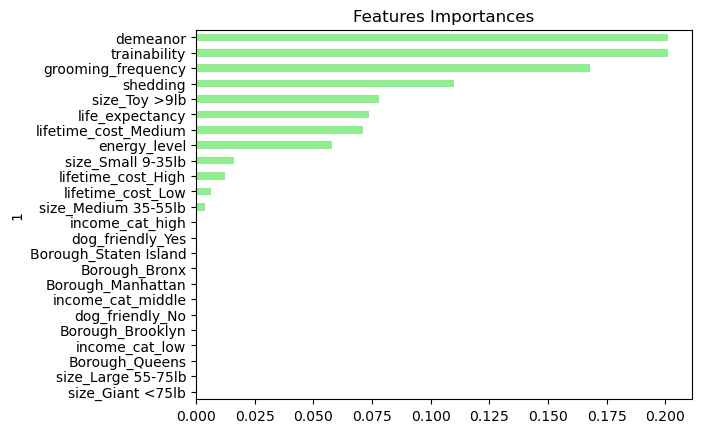

In [19]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# Model Evaluation

In [20]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9995213159459813


In [21]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[ 344    0    0 ...    0    0    0]
 [   0 1411    0 ...    0    0    0]
 [   0    0  156 ...    0    0    0]
 ...
 [   0    0    0 ...  168    0    0]
 [   0    0    0 ...    0  260    0]
 [   0    0    0 ...    0    0 8688]]


In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       344
           1       1.00      1.00      1.00      1411
           2       1.00      1.00      1.00       156
           3       1.00      1.00      1.00      2225
           4       1.00      1.00      1.00       116
           5       1.00      1.00      1.00       343
           6       1.00      1.00      1.00      1245
           7       0.00      0.00      0.00        33
           8       1.00      1.00      1.00       487
           9       1.00      1.00      1.00      1329
          10       1.00      1.00      1.00       991
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00       278
          13       1.00      1.00      1.00       277
          14       1.00      1.00      1.00      1792
          15       1.00      1.00      1.00      6034
          16       1.00      1.00      1.00      1445
          17       1.00    

C:\Users\sylhu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sylhu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sylhu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
